In [44]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 

In [45]:
california=fetch_california_housing()


In [46]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [47]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [48]:
california.target_names

['MedHouseVal']

In [49]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [50]:
## Data Frame Creation


dataset=pd.DataFrame(california.data,columns=california.feature_names)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [51]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

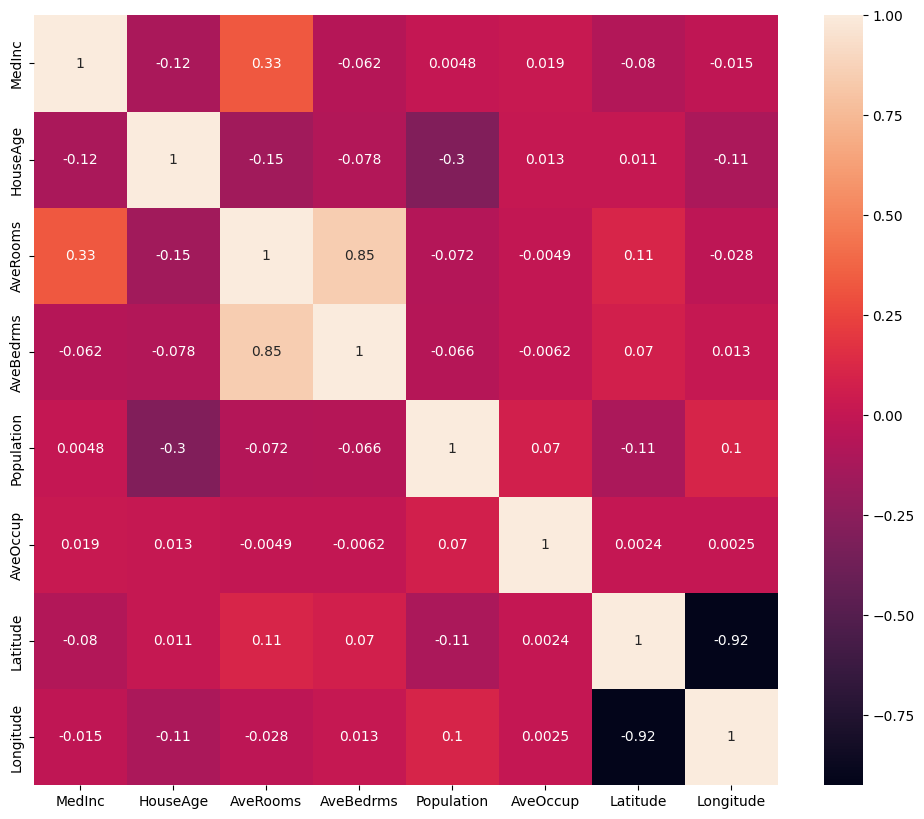

In [52]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr=dataset.corr()
sns.heatmap(corr,annot=True)

In [53]:
## data divsion Independent and dependent featurs

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [56]:
X,y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85
 ...       ...       ...       ...        ...         ...       ...       ...
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37
 
 [20640 rows x 7 columns],
 0       -122.23
 1       -122.22
 

In [57]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,random_state=10)

In [58]:
Xtrain.shape,Xtest.shape,ytrain.shape

((13828, 7), (6812, 7), (13828,))

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [61]:
Xtrain

array([[-0.72986836,  1.22081889, -0.70305988, ..., -0.95323738,
         0.05861244,  0.96929441],
       [-0.61046678, -0.28439808,  0.07828001, ..., -0.100776  ,
         0.13015917, -0.75823526],
       [ 0.00784578, -0.60128586, -0.2447376 , ...,  0.90779456,
        -0.09793279,  0.94594941],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.64381218,
         0.09549475,  0.78720344],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.64381218,
         0.18513096, -0.77224225],
       [-0.62742573, -0.99739558, -0.60483749, ...,  0.21758149,
        -0.08418874,  0.77786545]], shape=(13828, 7))

## Model tranign 

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
regrssion=LinearRegression()

In [64]:
regrssion.fit(Xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
regrssion.coef_,regrssion.intercept_

(array([-0.38326675, -0.20197421,  0.46922499, -0.26907594, -0.05145997,
         0.02531666, -1.92517105]),
 np.float64(-119.57109560312409))

In [66]:
y_pred=regrssion.predict(Xtest)
print(y_pred)

[-118.33276226 -121.46886088 -117.88748216 ... -118.71442746 -123.80080501
 -118.41853118]


In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(ytest,y_pred)
mae=mean_absolute_error(ytest,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

0.4561575464806637
0.49429518011916845
0.6753943636725611


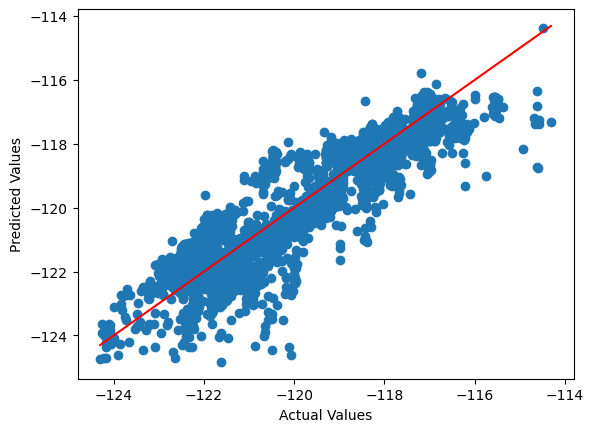

In [71]:
# # Option 1: Plot using the first feature only
# plt.scatter(Xtest[:,0], ytest)
# plt.plot(Xtest[:,0], regrssion.predict(Xtest), 'r')
# plt.xlabel('First Feature (Scaled)')
# plt.ylabel('Target Value')
# plt.show()

# Option 2: Plot actual vs predicted values (recommended for multiple features)
plt.scatter(ytest, regrssion.predict(Xtest))
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [72]:
from sklearn.metrics import r2_score

score=r2_score(ytest,y_pred)

In [73]:
score

0.8856648038343249

In [74]:
residuals=ytest-y_pred

In [75]:
residuals

20303   -0.847238
16966   -0.841139
10623    0.117482
6146     0.247380
2208     0.443101
           ...   
13490    0.372862
9340    -0.812999
17439   -1.735573
2602     0.280805
7180     0.238531
Name: Longitude, Length: 6812, dtype: float64

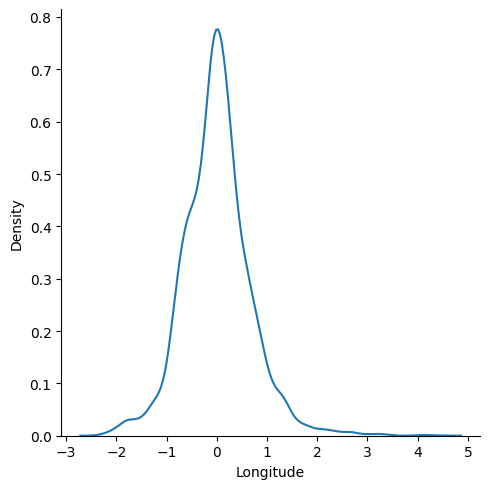

In [76]:
sns.displot(residuals,kind='kde')

In [79]:
import pickle 
pickle.dump(regrssion,open('W:/anaconda/18-5-25/temp/krishnaik/models/regrssion.pkl','wb'))

In [82]:
model=pickle.load(open('W:/anaconda/18-5-25/temp/krishnaik/models/regrssion.pkl','rb'))


In [83]:
model.predict(Xtest)

array([-118.33276226, -121.46886088, -117.88748216, ..., -118.71442746,
       -123.80080501, -118.41853118], shape=(6812,))